In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import monte_carlo as mc

You must install the tqdm library to use progress indicators with emcee


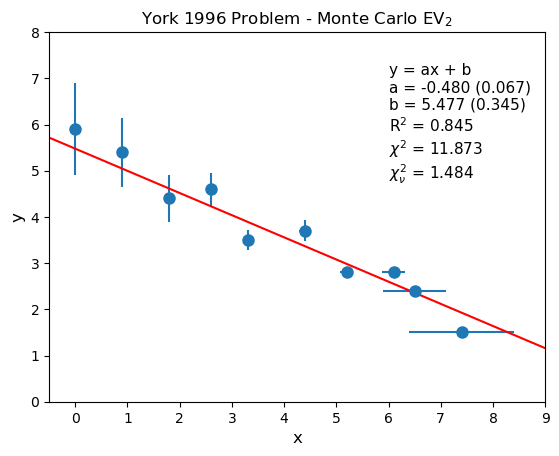

In [4]:
# York 1966 data and weights
x = np.array([0.0, 0.9, 1.8, 2.6, 3.3, 4.4, 5.2, 6.1, 6.5, 7.4])
y = np.array([5.9, 5.4, 4.4, 4.6, 3.5, 3.7, 2.8, 2.8, 2.4, 1.5])
wx = np.array([1e3, 1e3, 5e2, 8e2, 2e2, 8e1, 6e1, 2e1, 2.8, 1.0])
wy = np.array([1.0, 1.8, 4.0, 8.0, 2e1, 2e1, 7e1, 7e1, 1e2, 5e2])

# Convert weights into sigma
sigma_x = 1.0 / np.sqrt(wx)
sigma_y = 1.0 / np.sqrt(wy)

# Linear regression model with intercept
def linear_model(x, a, b):
    return a*x + b

# Perform Fitting
result = mc.fit_effective_variance_full(x, y, sigma_x, sigma_y, linear_model, [-0.5, 1.])

# Plot Result
fs = 12
ms = 8

fig = plt.figure()

x_plot = np.arange(-1, 10, 0.1)

plt.errorbar(x=x, y=y, xerr=sigma_x, yerr=sigma_y, marker="o", linestyle="", ms=ms)

plt.plot(x_plot, linear_model(x_plot, *result["fit_params"]), 'r-')

plt.xlabel("x", fontsize=fs)
plt.ylabel("y", fontsize=fs)

plt.xticks(ticks=np.arange(0, 10))
plt.yticks(ticks=np.arange(0, 9))

plt.xlim(-0.5, 9)

plt.tick_params(labelsize=fs-2)

scale = np.sqrt(result["chi2_red"])

s = f"y = ax + b\n\
a = {result['fit_params'][0]:.3f} ({result['param_uncertainties_mcmc'][0]*scale:.3f})\
\nb = {result['fit_params'][1]:.3f} ({result['param_uncertainties_mcmc'][1]*scale:.3f})\
\nR$^2$ = {result['weighted_r2']:.3f}\
\n$\\chi^2$ = {result['chi2']:.3f}\
\n$\\chi^2_\\nu$ = {result['chi2_red']:.3f}"

plt.text(s=s, x=6, y=6, va="center", fontsize=fs-1)

plt.title("York 1996 Problem - Monte Carlo EV$_2$")

plt.show()